In [ ]:
import pandas as pd

titanic = pd.read_csv("..\Dataset\TitanicModelComparison.csv")

# Data Preprocessing 
## Data Cleaning
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic['Sex'] = titanic['Sex'].fillna('male') 
titanic['SibSp'] = titanic['SibSp'].fillna(0)
titanic['Parch'] = titanic['Parch'].fillna(0)
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

## Data Transformation
titanic['Survived'] = titanic['Survived'].fillna(0)
titanic['Sex'] = titanic['Sex'].map({'male' : 0, 'female' : 1})
titanic['Embarked'] = titanic['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

titanic.head()

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\deepa\AppData\Local\Temp\ipykernel_22356\2240491894.py:3: SyntaxWarning: invalid escape sequence '\T'
  titanic = pd.read_csv("C:\Titanic-ML\Dataset\TitanicModelComparison.csv")


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [2]:
# Model Comparison and Accuracy 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feat = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[feat]
y = titanic['Survived']
models = {
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'DTC' : DecisionTreeClassifier(random_state=42),
    'RFC': RandomForestClassifier(random_state=42)
}
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
for name, model in models.items():
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    print(f"{name} Model Accuracy: {acc:.2%}\n")

KNN Model Accuracy: 72.22%

DTC Model Accuracy: 77.78%

RFC Model Accuracy: 81.11%



<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\deepa\AppData\Local\Temp\ipykernel_22356\724324106.py:2: SyntaxWarning: invalid escape sequence '\T'
  titanic.to_csv("C:\Titanic-ML\Dataset\TitanicUpdated.csv", index=False)


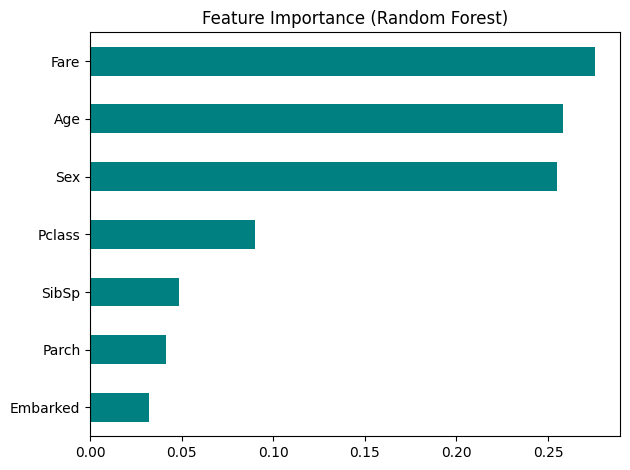

In [ ]:
# Saving the changes into CSV 
titanic.to_csv("C:\Titanic-ML\Dataset\TitanicUpdated.csv", index=False)


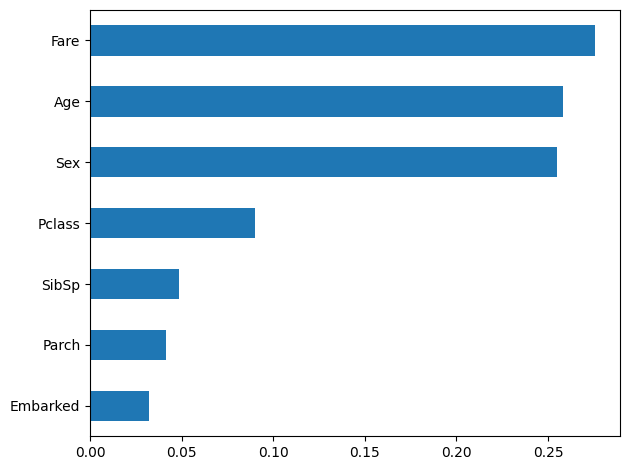

In [13]:
import matplotlib.pyplot as plt

rf = models['RFC']
importances = pd.Series(rf.feature_importances_, index=feat)
importances.sort_values().plot(kind='barh')
plt.tight_layout()
plt.show()
